In [57]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

In [58]:
timing_columns = list(["N", "type", "time (ms)"])
smoothed_path_df = pd.DataFrame(columns=timing_columns)

with open('./test_nanomap.txt') as f:
    lines = f.readlines()
    for line in lines:    
        words = line.split()
        words[0] = int(words[0])
        words[1] = float(words[1])/1000000
        words[2] = float(words[2])/1000000
        
        smoothed_path_df_add = pd.DataFrame([[ words[0], "merged", words[1] ]], columns=timing_columns)
        smoothed_path_df = smoothed_path_df.append(smoothed_path_df_add, ignore_index=True)
        smoothed_path_df_add = pd.DataFrame([[words[0], "new", words[2] ]], columns=timing_columns)
        smoothed_path_df = smoothed_path_df.append(smoothed_path_df_add, ignore_index=True)

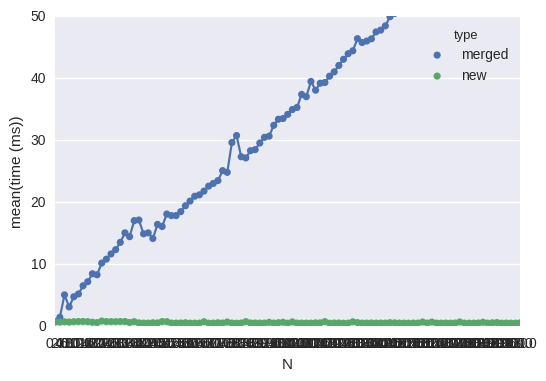

In [59]:
sns.set_style("darkgrid")
ax1 = sns.pointplot(x="N", y="time (ms)", hue="type", data=smoothed_path_df, scale=0.5)
ax1.set_ylim(0,50)
ax1.set_xlim(0,100)
plt.show()

In [60]:
smoothed_path_df = pd.DataFrame(columns=timing_columns)
with open('./test_nanomap.txt') as f:
    total_time = 0
    lines = f.readlines()
    for line in lines:    
        words = line.split()
        words[0] = int(words[0])
        words[1] = float(words[1])/1000000
        words[2] = float(words[2])/1000000
        total_time = total_time + words[1]
        
        smoothed_path_df_add = pd.DataFrame([[ words[0], "merged", total_time ]], columns=timing_columns)
        smoothed_path_df = smoothed_path_df.append(smoothed_path_df_add, ignore_index=True)
        smoothed_path_df_add = pd.DataFrame([[words[0], "new", words[2] ]], columns=timing_columns)
        smoothed_path_df = smoothed_path_df.append(smoothed_path_df_add, ignore_index=True)

In [61]:
# sns.lmplot(x="N", y="time (ms)", hue="type", data=smoothed_path_df, x_estimator=np.mean, truncate=True)
# major_ticks = np.arange(0, 101, 20) 
# minor_ticks = np.arange(0, 101, 5)  
# ax1.set_xticks(major_ticks)                                                       
# ax1.set_xticks(minor_ticks, minor=True)  
# ax1.set_ylim(0,100)
# ax1.set_xlim(0,100)
# plt.show()

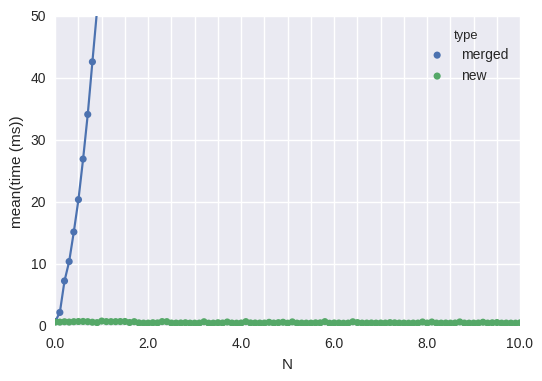

In [64]:
sns.set_style("darkgrid")
ax1 = sns.pointplot(x="N", y="time (ms)", hue="type", data=smoothed_path_df, scale=0.5)
major_ticks = np.arange(0, 101, 20) 
minor_ticks = np.arange(0, 101, 5)  
ax1.set_xticks(major_ticks)                                                       
ax1.set_xticks(minor_ticks, minor=True)  
ax1.set_ylim(0,50)
ax1.set_xlim(0,100)
plt.show()

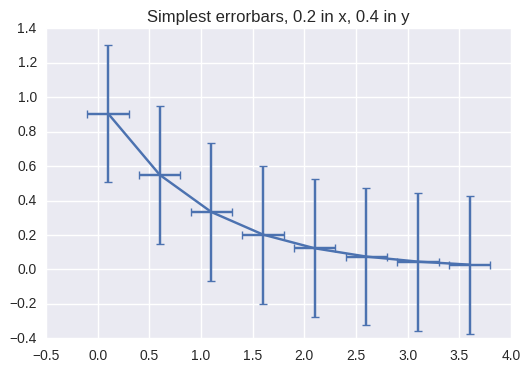

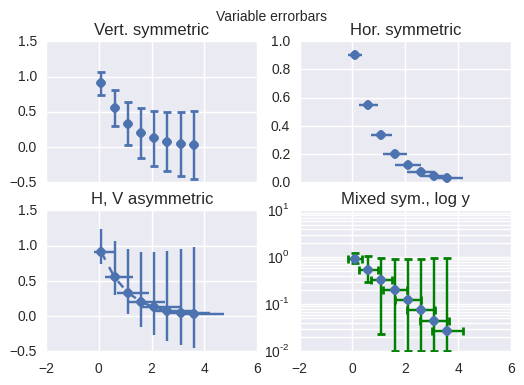

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4, capthick=1)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o', capthick=2)
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

fig.suptitle('Variable errorbars')

plt.show()

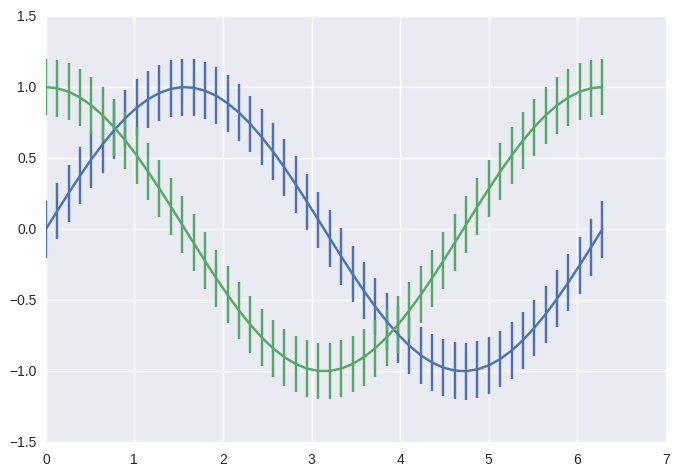

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
y_sin = np.sin(x)
y_cos = np.cos(x)
plt.errorbar(x, y_sin, 0.2)
plt.errorbar(x, y_cos, 0.2)
plt.show()

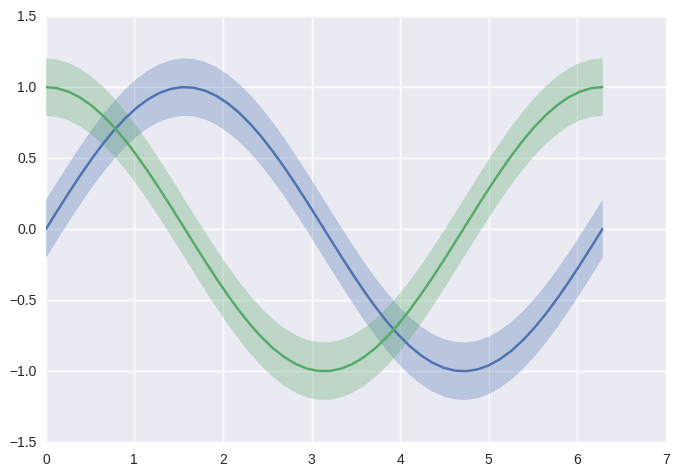

In [54]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)
    
    
errorfill(x, y_sin, 0.2)
errorfill(x, y_cos, 0.2)
plt.show()

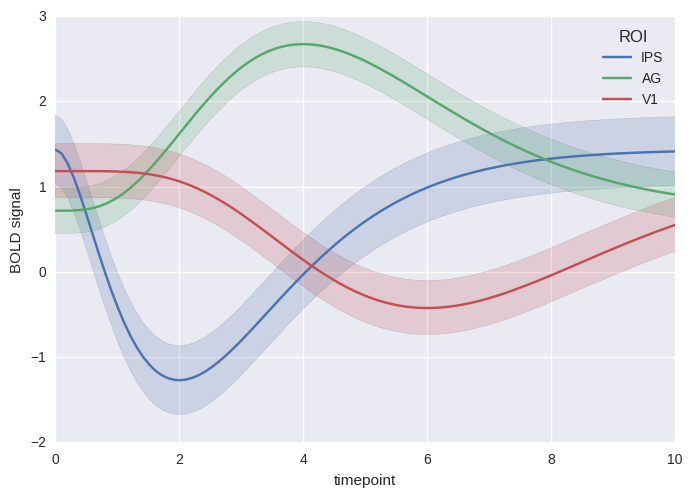

In [56]:
gammas = sns.load_dataset("gammas")
ax = sns.tsplot(time="timepoint", value="BOLD signal",
               unit="subject", condition="ROI",
               data=gammas)